In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Baca dataset
coffee = pd.read_csv('Coffe dataset.csv')
coffee.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [3]:
# Info dataframe
coffee.info()
coffee.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


(3636, 6)

In [4]:
# Cek missing values
coffee.isnull().sum()
coffee.isnull().sum() / coffee.shape[0] * 100

,0
date,0.000000
datetime,0.000000
cash_type,0.000000
card,2.447745
money,0.000000
coffee_name,0.000000


In [5]:
# Hapus kolom dengan missing values
coffee.drop('card', axis=1, inplace=True)

In [6]:
# Cek lagi
coffee.isnull().values.any()

np.False_

In [7]:
# Ubah kolom datetime sehingga hanya menghasilkan waktu pembelian
coffee['datetime'] = pd.to_datetime(coffee['datetime']).dt.strftime('%H:%M')


In [8]:
# Cek kembali tabel
coffee.head()

,date,datetime,cash_type,money,coffee_name
0,2024-03-01,10:15,card,38.7,Latte
1,2024-03-01,12:19,card,38.7,Hot Chocolate
2,2024-03-01,12:20,card,38.7,Hot Chocolate
3,2024-03-01,13:46,card,28.9,Americano
4,2024-03-01,13:48,card,38.7,Latte


In [9]:
# Buat kolom baru berdasarkan tahun bulan dan hari pembelian
coffee['date'] = pd.to_datetime(coffee['date'])
coffee['month'] = coffee['date'].dt.month
coffee['year'] = coffee['date'].dt.year
coffee['day_name'] = coffee['date'].dt.day_name()
coffee.head()

,date,datetime,cash_type,money,coffee_name,month,year,day_name
0,2024-03-01,10:15,card,38.7,Latte,3,2024,Friday
1,2024-03-01,12:19,card,38.7,Hot Chocolate,3,2024,Friday
2,2024-03-01,12:20,card,38.7,Hot Chocolate,3,2024,Friday
3,2024-03-01,13:46,card,28.9,Americano,3,2024,Friday
4,2024-03-01,13:48,card,38.7,Latte,3,2024,Friday


In [10]:
# Hilangkan kolom date
coffee.drop('date', axis=1, inplace=True)
#cek lagi tabelnya
coffee.head()

,datetime,cash_type,money,coffee_name,month,year,day_name
0,10:15,card,38.7,Latte,3,2024,Friday
1,12:19,card,38.7,Hot Chocolate,3,2024,Friday
2,12:20,card,38.7,Hot Chocolate,3,2024,Friday
3,13:46,card,28.9,Americano,3,2024,Friday
4,13:48,card,38.7,Latte,3,2024,Friday


In [12]:
# Kelompokkan berdasarkan waktu pembelian
coffee['datetime'] = pd.to_datetime(coffee['datetime'])

def time_of_day(hour):
  if 6 <= hour < 12:
    return 'Morning'
  elif 12<= hour < 18:
    return 'Afternoon'
  else:
    return 'Night'

coffee['time_of_day'] = coffee['datetime'].dt.hour.apply(time_of_day)
coffee.head()

,datetime,cash_type,money,coffee_name,month,year,day_name,time_of_day
0,2025-08-26 10:15:00,card,38.7,Latte,3,2024,Friday,Morning
1,2025-08-26 12:19:00,card,38.7,Hot Chocolate,3,2024,Friday,Afternoon
2,2025-08-26 12:20:00,card,38.7,Hot Chocolate,3,2024,Friday,Afternoon
3,2025-08-26 13:46:00,card,28.9,Americano,3,2024,Friday,Afternoon
4,2025-08-26 13:48:00,card,38.7,Latte,3,2024,Friday,Afternoon


In [13]:
# Hapus kolom datetime
coffee.drop('datetime', axis=1, inplace=True)
coffee.head(10)

,cash_type,money,coffee_name,month,year,day_name,time_of_day
0,card,38.7,Latte,3,2024,Friday,Morning
1,card,38.7,Hot Chocolate,3,2024,Friday,Afternoon
2,card,38.7,Hot Chocolate,3,2024,Friday,Afternoon
3,card,28.9,Americano,3,2024,Friday,Afternoon
4,card,38.7,Latte,3,2024,Friday,Afternoon
5,card,33.8,Americano with Milk,3,2024,Friday,Afternoon
6,card,38.7,Hot Chocolate,3,2024,Friday,Afternoon
7,card,33.8,Americano with Milk,3,2024,Friday,Night
8,card,38.7,Cocoa,3,2024,Friday,Night
9,card,33.8,Americano with Milk,3,2024,Friday,Night


In [14]:
from google.colab import files

coffee.to_csv("coffee.csv", index=False)
files.download("coffee.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
# Penjualan per harinya
sales_by_day = coffee.groupby('day_name')['money'].sum().reset_index()
sales_by_day = sales_by_day.sort_values(by='money', ascending=False) #diurutkan dari besar ke kecil
print(sales_by_day)

    day_name     money
5    Tuesday  18637.38
1     Monday  17925.10
0     Friday  17257.66
4   Thursday  16477.40
6  Wednesday  16093.46
2   Saturday  15182.52
3     Sunday  13858.06


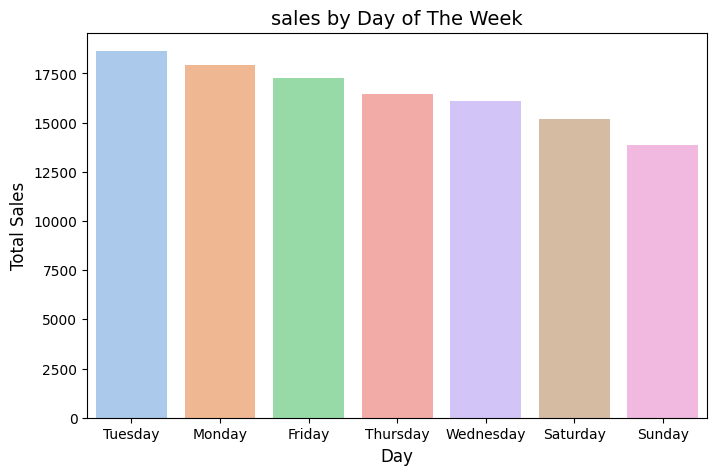

In [20]:
# Bar Chart berdasarkan penjualan  per hari
plt.figure(figsize=(8,5))
sns.barplot(x='day_name', y='money', hue='day_name', data=sales_by_day, palette='pastel', legend=False)
plt.title('sales by Day of The Week', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

In [21]:
# Penjualan berdasarkan tipe pembayaran
sales_by_cash_type = coffee.groupby('cash_type')['money'].sum().reset_index()
print(sales_by_cash_type)

  cash_type      money
0      card  112245.58
1      cash    3186.00


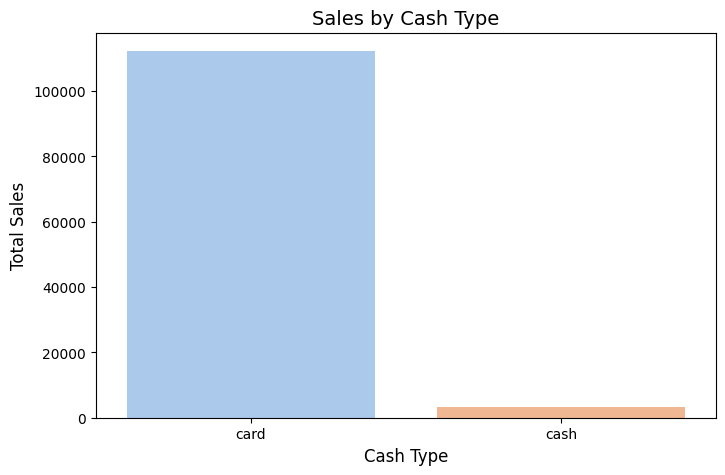

In [22]:
# Bar Chart berdasarkan tipe pembayaran
plt.figure(figsize=(8,5))
sns.barplot(x='cash_type', y='money', hue='cash_type', data=sales_by_cash_type, palette='pastel', legend=False)
plt.title('Sales by Cash Type', fontsize=14)
plt.xlabel('Cash Type', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()


In [23]:
# Hitung penjualan berdasarkan bulan dan tahunnya
sales_by_month_year = coffee.groupby(['year', 'month'])['money'].sum().reset_index()
sales_by_month_year = sales_by_month_year.sort_values(by='money', ascending=False)
sales_by_month_year['year_month'] = sales_by_month_year['year'].astype(str) + '-'+ sales_by_month_year['month'].astype(str)
print(sales_by_month_year)

    year  month     money year_month
7   2024     10  13891.16    2024-10
11  2025      2  13215.48     2025-2
6   2024      9   9988.64     2024-9
12  2025      3   9986.44     2025-3
2   2024      5   9063.42     2024-5
8   2024     11   8590.54    2024-11
9   2024     12   8237.74    2024-12
3   2024      6   7758.76     2024-6
5   2024      8   7613.84     2024-8
0   2024      3   7050.20     2024-3
4   2024      7   6915.94     2024-7
1   2024      4   6720.56     2024-4
10  2025      1   6398.86     2025-1


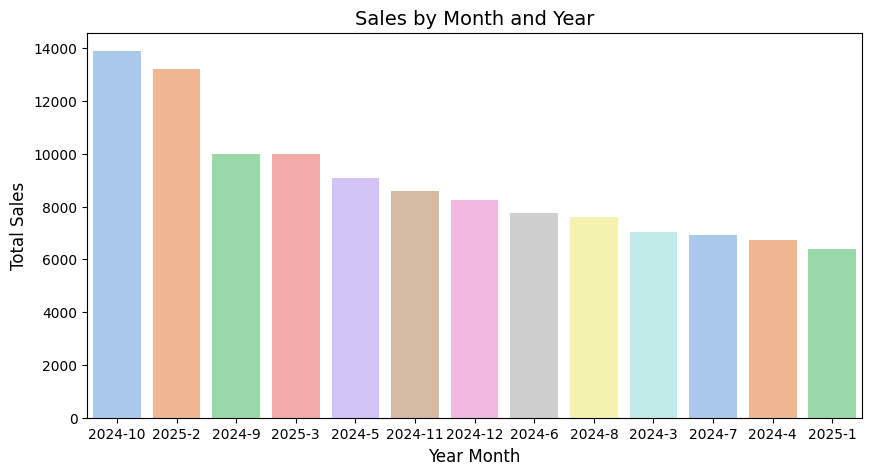

In [24]:
# Buat diagram berdasarkan penjualan per bulan dan tahunnya
plt.figure(figsize=(10,5))
sns.barplot(x='year_month', y='money', hue='year_month', data=sales_by_month_year, palette='pastel', legend=False)
plt.title('Sales by Month and Year', fontsize=14)
plt.xlabel('Year Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

In [25]:
# Coffee paling favorit yang banyak dibeli berdasarkan waktu pembelian
fav_coffes_by_time = coffee.groupby(['time_of_day', 'coffee_name'])['money'].sum().reset_index()
fav_coffes_by_time = fav_coffes_by_time.sort_values(by='money', ascending=False)
print(fav_coffes_by_time)

   time_of_day          coffee_name     money
7    Afternoon                Latte  11512.22
9      Morning  Americano with Milk  10199.52
1    Afternoon  Americano with Milk   9158.38
15     Morning                Latte   8403.18
23       Night                Latte   7950.90
2    Afternoon           Cappuccino   7449.44
0    Afternoon            Americano   7257.34
18       Night           Cappuccino   6098.26
17       Night  Americano with Milk   5911.22
8      Morning            Americano   5820.10
10     Morning           Cappuccino   4486.44
22       Night        Hot Chocolate   4387.84
6    Afternoon        Hot Chocolate   4000.22
12     Morning              Cortado   3665.46
3    Afternoon                Cocoa   3413.50
19       Night                Cocoa   3166.28
4    Afternoon              Cortado   2728.14
11     Morning                Cocoa   2098.38
16       Night            Americano   1984.82
14     Morning        Hot Chocolate   1784.40
5    Afternoon             Espress

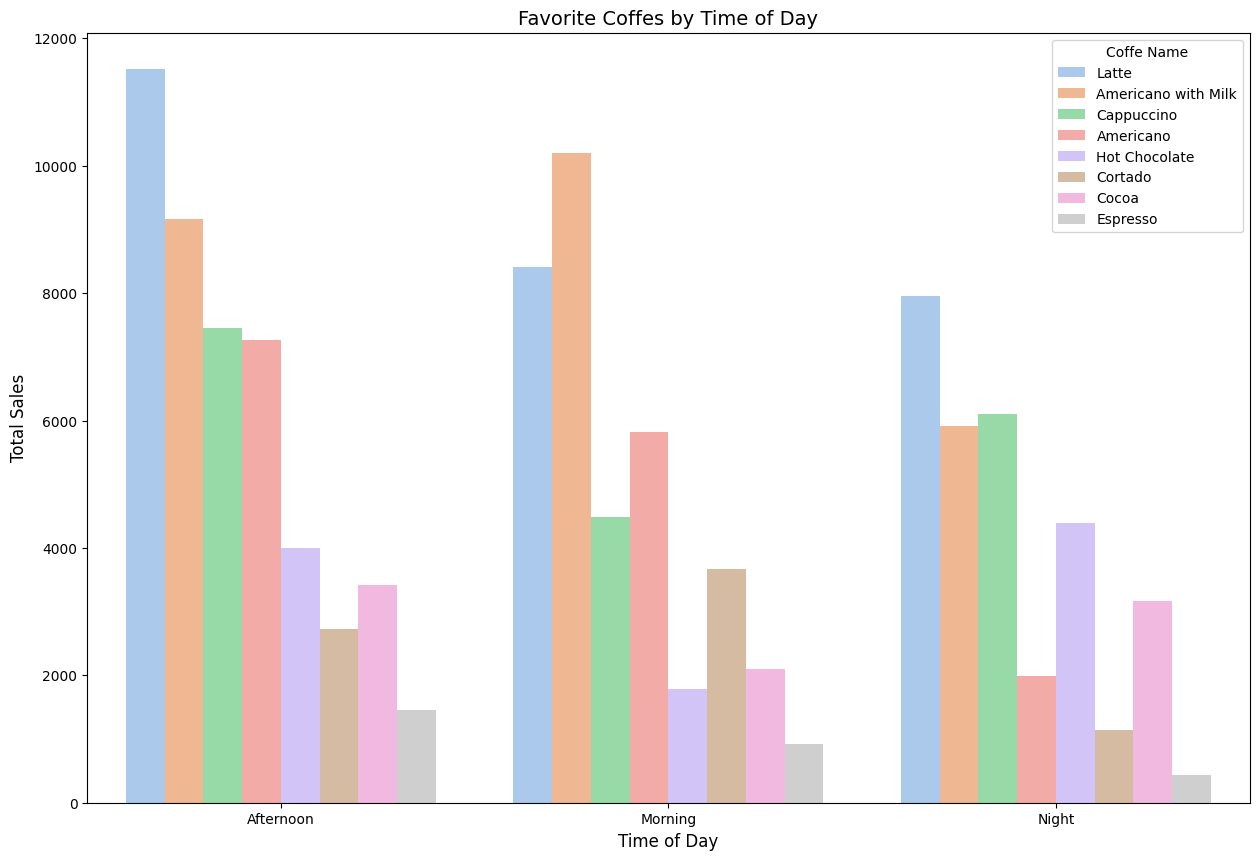

In [26]:
# Grafik berdasarkan coffes yang paling favorit
plt.figure(figsize=(15,10))
sns.barplot(x='time_of_day', y='money', hue='coffee_name', data=fav_coffes_by_time, palette='pastel')
plt.legend(title='Coffe Name', loc='upper right')
plt.title('Favorite Coffes by Time of Day', fontsize=14)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

In [27]:
# Penjualan coffe paling banyak berdasarkan waktu per hari
sales_by_time = coffee.groupby('time_of_day')['money'].sum().reset_index()
sales_by_time = sales_by_time.sort_values(by='money', ascending=False)
print(sales_by_time)

  time_of_day     money
0   Afternoon  46978.80
1     Morning  37380.20
2       Night  31072.58


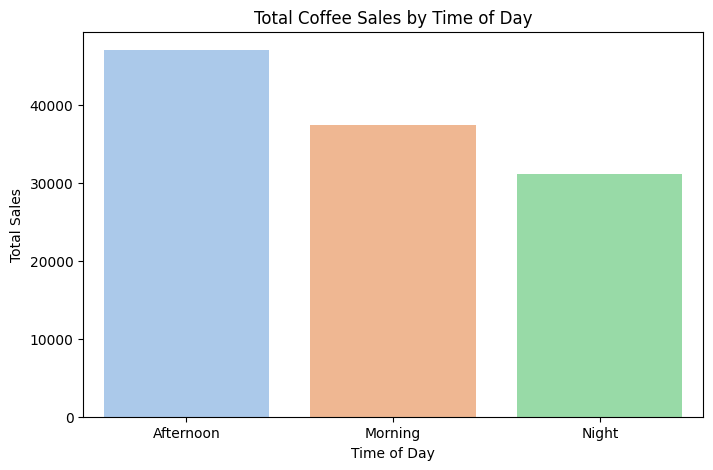

In [28]:
# Chart dari penjualan coffe paling banyak berdasarkan waktu per hari
plt.figure(figsize=(8,5))
sns.barplot(x='time_of_day', y='money', data=sales_by_time, palette='pastel', hue='time_of_day')
plt.title('Total Coffee Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.show()

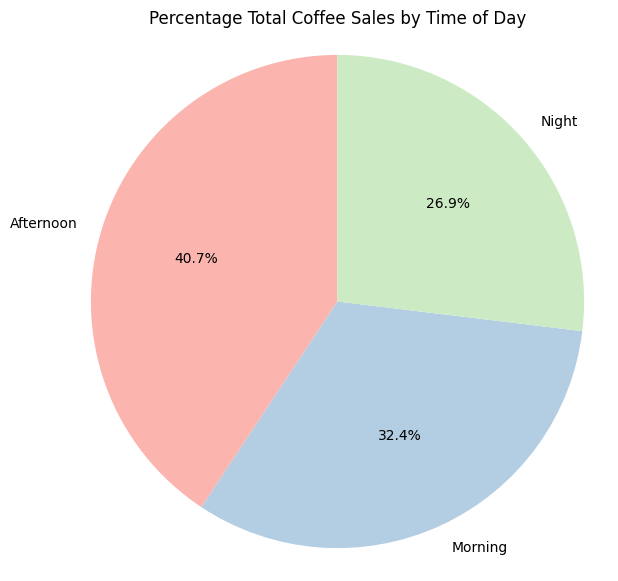

In [29]:
# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    sales_by_time['money'],
    labels=sales_by_time['time_of_day'],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors  # palet warna lembut
)

plt.title('Percentage Total Coffee Sales by Time of Day')
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran sempurna
plt.show()

In [30]:
# Penjualan coffe berdasarkan kategori
sales_by_coffee_name = coffee.groupby('coffee_name')['money'].sum().reset_index()
sales_by_coffee_name = sales_by_coffee_name.sort_values(by='money', ascending=False)
print(sales_by_coffee_name)

           coffee_name     money
7                Latte  27866.30
1  Americano with Milk  25269.12
2           Cappuccino  18034.14
0            Americano  15062.26
6        Hot Chocolate  10172.46
3                Cocoa   8678.16
4              Cortado   7534.86
5             Espresso   2814.28


In [31]:
# Penjualan coffe berdasarkan kategori
coffee_counts = coffee['coffee_name'].value_counts().reset_index()
coffee_counts.columns = ['coffee_name', 'total_transactions']
print(coffee_counts)

           coffee_name  total_transactions
0  Americano with Milk                 824
1                Latte                 782
2            Americano                 578
3           Cappuccino                 501
4              Cortado                 292
5        Hot Chocolate                 282
6                Cocoa                 243
7             Espresso                 134


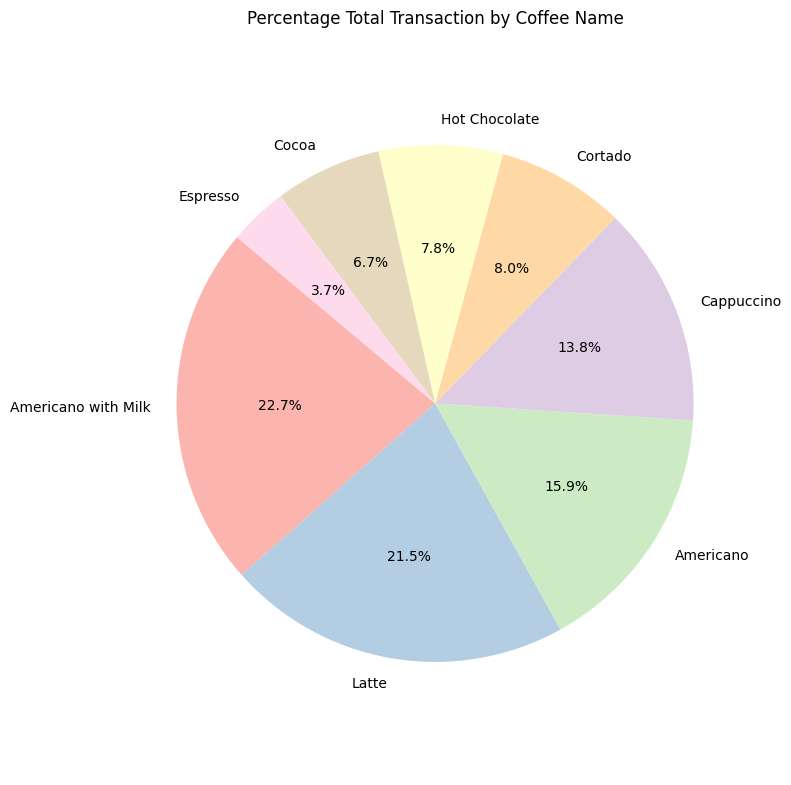

In [32]:
# Pie chart berdasarkann total transaction
plt.figure(figsize=(8, 8))
plt.pie(
    coffee_counts['total_transactions'],
    labels=coffee_counts['coffee_name'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors  # palet warna lembut
)

plt.title('Percentage Total Transaction by Coffee Name')
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran sempurna
plt.tight_layout()
plt.show()

In [33]:
# Gabungkan total omzet
summary = pd.merge(sales_by_coffee_name, coffee_counts, on='coffee_name')
summary = summary.sort_values(by='money', ascending=False)
print(summary)

           coffee_name     money  total_transactions
0                Latte  27866.30                 782
1  Americano with Milk  25269.12                 824
2           Cappuccino  18034.14                 501
3            Americano  15062.26                 578
4        Hot Chocolate  10172.46                 282
5                Cocoa   8678.16                 243
6              Cortado   7534.86                 292
7             Espresso   2814.28                 134


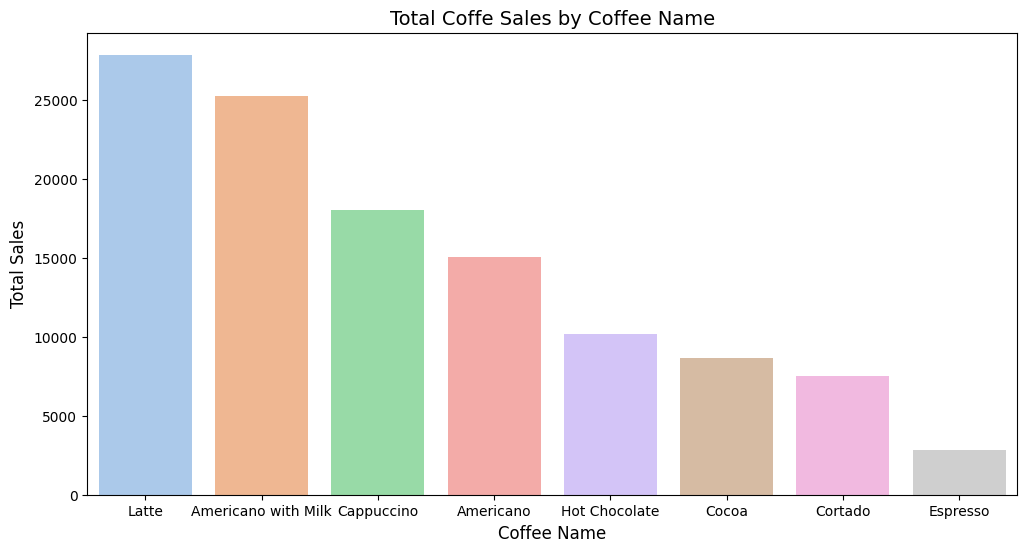

In [34]:
# Bar Chart total omzet
plt.figure(figsize=(12,6))
sns.barplot(x='coffee_name', y='money', data=sales_by_coffee_name, hue='coffee_name', palette='pastel', legend=False)
plt.title('Total Coffe Sales by Coffee Name', fontsize=14)
plt.xlabel('Coffee Name', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()